# Objective

Upon initial inspection of the data, we start thinking of questions that we would like to answer during the analysis

-overall sales trend
-top 10 product by sales
-top 10 most selling products
-most preferred/used shipping mode 
-most profitable category and sub-category


# Importing libraries, dataset and cleaning data set

In [3]:
# Importing Required Libraries

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [34]:
# Importing the dataset

df = pd.read_excel(r'C:\Users\cubie\Dataset_superstore_sales.xlsx')

In [5]:
# Data Cleaning 

df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
df.tail(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [7]:
# To know the shape of the dataset

df.shape

(51290, 21)

In [8]:
#Columns present in dataset

df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [11]:
# Checking for missing values

df.isnull().sum()

# If null value exists
# Run 
# df = df.dropna()


order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
# Checking for duplicate values

duplicate_rows_df = df[df.duplicated()]
print ("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 21)


In [13]:
# Getting descriptive statistics summary 

df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Data Exploration and Analysis

Overall Sales Trend

In [14]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [16]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [20]:
# Getting year-month from the dataset

df['month_year'] = df['order_date'].apply(lambda x:x.strftime('%Y-%m'))

In [24]:
# Grouping year-month and taking sum of sales

df_monthlysales_trend = df.groupby('month_year').sum()['sales'].reset_index()

In [26]:
df_monthlysales_trend.head()

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


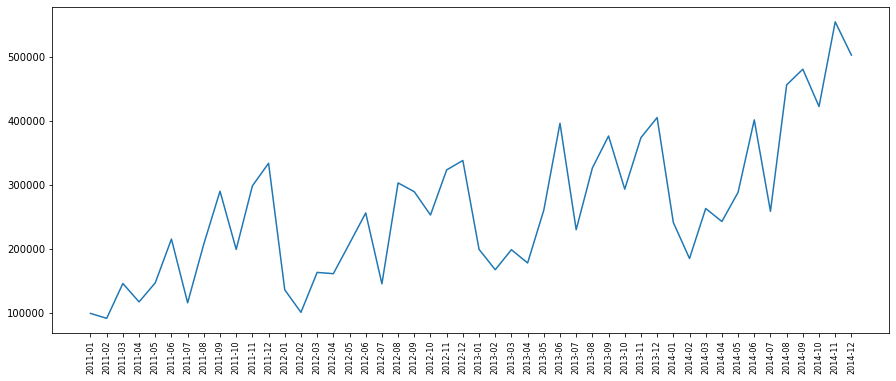

In [30]:
# Visualizing the sales trend using matplot
plt.figure(figsize=(15,6))
plt.xticks(rotation ='vertical', size=8)

plt.plot(df_monthlysales_trend['month_year'], df_monthlysales_trend['sales'])

plt.show()

In [33]:
# Grouping product name column by sales
# creating a dataframe for product by sales 
# DataFrame

prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [39]:
# sorting by descending sales value

prod_sales = prod_sales.sort_values('sales', ascending=False)

In [43]:
# Top 10 products by sales

prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [47]:
# Grouping product name
# creating a dataframe into object
# creating most_sold object 

most_sold=pd.DataFrame(df.groupby('product_name').sum()['quantity'])

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [48]:
# Sorting for most_sold_products

most_sold = most_sold.sort_values('quantity', ascending=False)

In [78]:
# Picking the top 10 most sold product

most_sold[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


In [5]:
# Counting the number of ship modes used

df.groupby('ship_mode').count()['order_id']

ship_mode
First Class        7505
Same Day           2701
Second Class      10309
Standard Class    30775
Name: order_id, dtype: int64

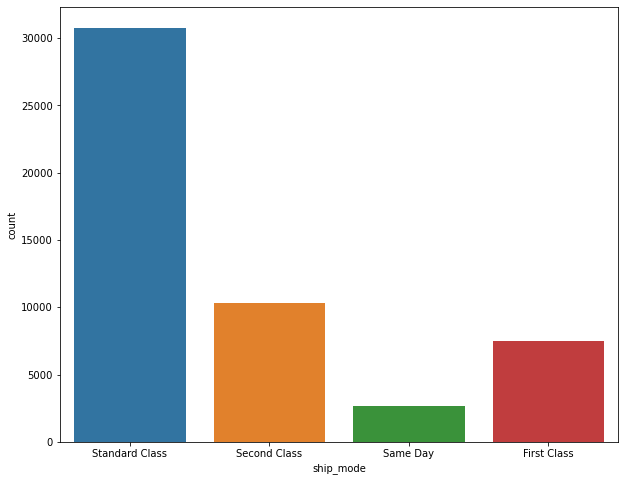

In [9]:
# creating the count plot
# Showing the sounts of observations in each categorical bin using bars

plt.figure(figsize=(10,8))
sns.countplot(x='ship_mode', data=df)
plt.show()

In [11]:
# Grouping by category and subcategory
# creating a dataframe into an object

cat_subcat_profit= pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

In [12]:
# Sorting the dataframe

cat_subcat_profit.sort_values(['profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Office Supplies Appliances    141680.58940
Technology      Accessories   129626.30620
Office Supplies Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
Technology      Machines       58867.87300
Office Supplies Art            57953.91090
Furniture       Furnishings    46967.42550
Office Supplies Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Tables        -64083.38870

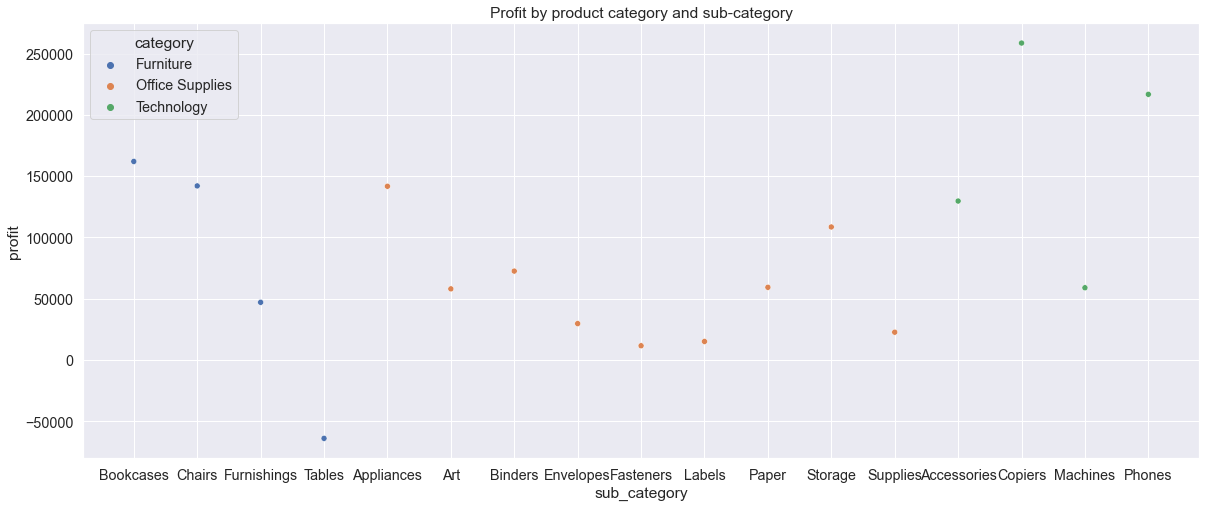

In [33]:
# Visualization

sns.set_theme(font_scale=1.3) # set theme for plots

plt.figure(figsize=(20, 8))
sns.scatterplot(data=cat_subcat_profit,
                x="sub_category",
                y="profit",
                hue="category"
               )
plt.title('Profit by product category and sub-category')
plt.show()